In [70]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn  # Graphics
import pandas as pd # Tabular data manipulation
import rioxarray  # Surface data manipulation
import xarray  # Surface data manipulation
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights
import contextily  # Background tiles
import geopandas as gpd  # Spatial data manipulation

import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [71]:
state = "STE_2021_AUST_SHP_GDA2020/STE_2021_AUST_GDA2020.shp"
state = gpd.read_file(state)
state = state.loc[state.is_valid]
state['STE_CODE21']=state['STE_CODE21'].astype(int)

In [72]:
wages_path = 'wages2020Q1.xlsx'

wages_2020_Q1 = pd.read_excel(wages_path, engine='openpyxl')
wages_2020_Q1 = pd.DataFrame(wages_2020_Q1)
wages_2020_Q1['STE_CODE21']=wages_2020_Q1['STE_CODE21'].astype(int)

In [73]:
state_wages_2020_Q1 = state.merge(wages_2020_Q1, on='STE_CODE21', how='left')
state_wages_2020_Q1 = state_wages_2020_Q1.set_index('STE_CODE21')
state_wages_2020_Q1 =state_wages_2020_Q1.iloc[:7]


In [74]:
# state_wages_2020_Q1.plot(
#     figsize=(12, 24),
#     column="actual_change",
#     scheme="Quantiles",
#     k = 4,
#     cmap="GnBu",
#     edgecolor="grey",
#     legend=True
# ).axis("off");

In [75]:
# state_wages_2020_Q1.plot(
#     figsize=(12, 24),
#     column="predicted_change",
#     scheme="Quantiles",
#     k = 4,
#     cmap="GnBu",
#     edgecolor="grey",
#     legend=True
# ).axis("off");

In [76]:
# state_wages_2020_Q1.plot(
#     figsize=(12, 24),
#     column="change_diff",
#     scheme="Quantiles",
#     k = 4,
#     cmap="GnBu",
#     edgecolor="grey",
#     legend=True
# ).axis("off");

In [77]:
# state_wages_2020_Q1.plot(
#     figsize=(12, 24),
#     column="actual",
#     scheme="Quantiles",
#     k = 4,
#     cmap="GnBu",
#     edgecolor="grey",
#     legend=True
# ).axis("off");

In [78]:
# state_wages_2020_Q1.plot(
#     figsize=(12, 24),
#     column="predicted_actual",
#     scheme="Quantiles",
#     k = 4,
#     cmap="GnBu",
#     edgecolor="grey",
#     legend=True
# ).axis("off");

In [79]:
# state_wages_2020_Q1.plot(
#     figsize=(12, 24),
#     column="actual_change",
#     scheme="Quantiles",
#     k = 4,
#     cmap="GnBu",
#     edgecolor="grey",
#     legend=True
# ).axis("off");

In [80]:
wq =  lps.weights.Queen.from_dataframe(state_wages_2020_Q1)

wq.transform = 'r'


change_diff = state_wages_2020_Q1['change_diff']
ylag = lps.weights.lag_spatial(wq, change_diff)


('WARNING: ', 5, ' is an island (no neighbors)')


E:\Uni\research\venv\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 5.
  warnings.warn(message)


In [81]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)
print(ylagq5)

Quantiles

   Interval      Count
----------------------
[-0.17, -0.15] |     2
(-0.15, -0.12] |     1
(-0.12, -0.05] |     1
(-0.05, -0.01] |     1
(-0.01,  0.00] |     2


E:\Uni\research\venv\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
E:\Uni\research\venv\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


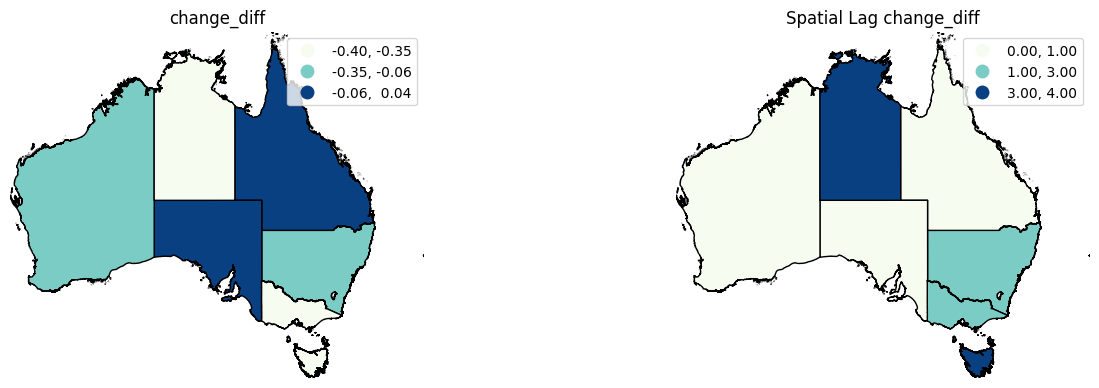

In [93]:
f,ax = plt.subplots(1,2,figsize=(3.5*4.5,4.5))
state_wages_2020_Q1['lag_in_change'] = ylagq5.yb


state_wages_2020_Q1.plot(column='change_diff', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=3, cmap='GnBu', legend=True)
ax[0].axis(state_wages_2020_Q1.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("change_diff")

state_wages_2020_Q1.plot(column='lag_in_change', ax=ax[1], edgecolor='k',
        scheme="quantiles",  k=3, cmap='GnBu', legend=True)
ax[1].axis(state_wages_2020_Q1.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag change_diff")

ax[0].axis('off')
ax[1].axis('off')
plt.show()

Global Spatial Autocorrelation

E:\Uni\research\venv\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

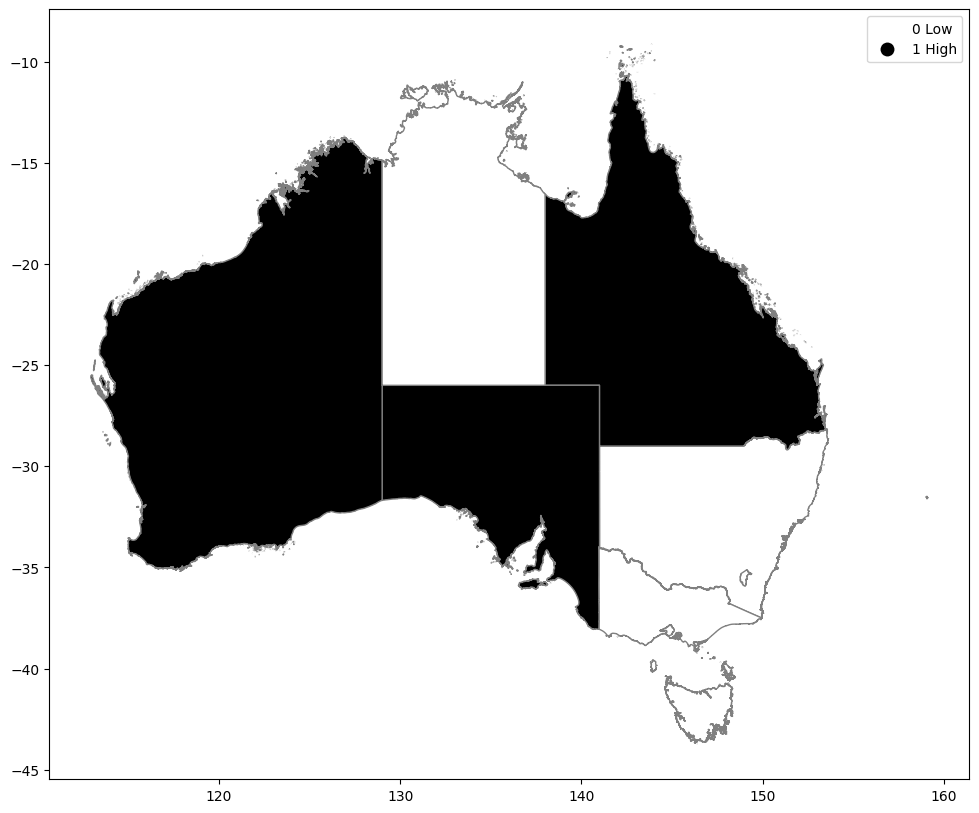

In [94]:
y = change_diff

y.median()
yb = y > y.median()
sum(yb)
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb]
state_wages_2020_Q1['yb'] = yb
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
state_wages_2020_Q1.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

Local Autocorrelation: Hot Spots, Cold Spots, and Spatial Outliers


('WARNING: ', 5, ' is an island (no neighbors)')


E:\Uni\research\venv\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 5.
  warnings.warn(message)


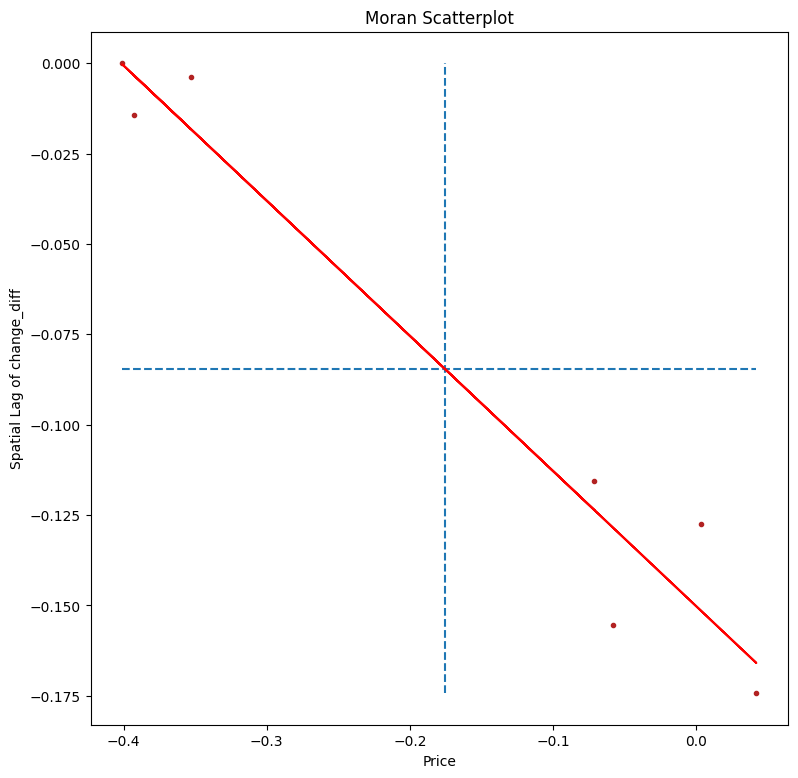

In [103]:
np.random.seed(12345)
import esda

wq =  lps.weights.Queen.from_dataframe(state_wages_2020_Q1)
wq.transform = 'r'

lag_change_diff = lps.weights.lag_spatial(wq, state_wages_2020_Q1['change_diff'])
lag_change_diff[np.isnan(lag_change_diff)] = 0

change_diff = state_wages_2020_Q1['change_diff']
b, a = np.polyfit(change_diff, lag_change_diff, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(change_diff, lag_change_diff, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(change_diff.mean(), lag_change_diff.min(), lag_change_diff.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_change_diff.mean(), change_diff.min(), change_diff.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(change_diff, a + b*change_diff, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of change_diff')
plt.xlabel('Price')
plt.show()


In [100]:
li = esda.moran.Moran_Local(change_diff, wq)
li.q

E:\Uni\research\venv\lib\site-packages\esda\moran.py:1057: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


array([1, 2, 1, 1, 1, 3, 2])

In [101]:
(li.p_sim < 0.05).sum()

2

E:\Uni\research\venv\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


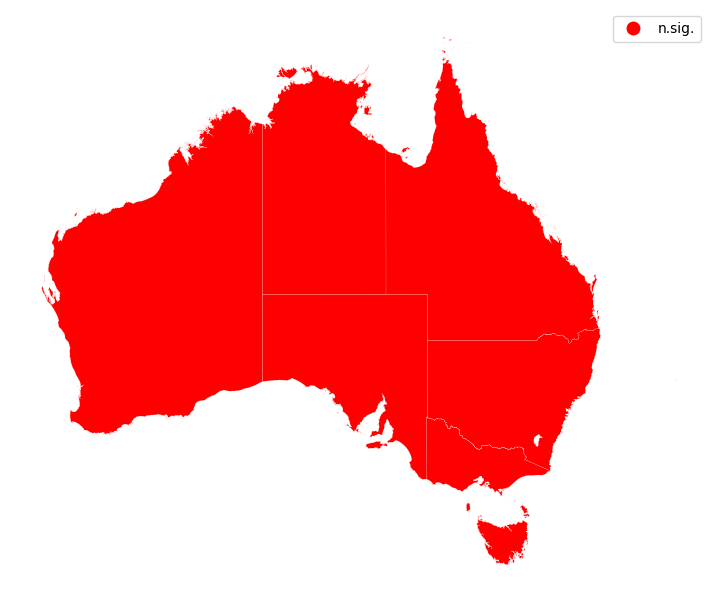

In [102]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

df = state_wages_2020_Q1
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()